<a href="https://colab.research.google.com/github/bahing-rai/AI-Coursework/blob/main/AI(coursework).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing librarires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

#Loading Dataset

In [2]:
df = pd.read_csv("muse_v3.csv")

#Dropping rows with missing emotion values

In [3]:
df = df.dropna(subset=["valence_tags", "arousal_tags", "dominance_tags"])

#Defining binary target: Is valence (positivity) high?

In [4]:
df["is_positive"] = df["valence_tags"].apply(lambda x: 1 if x >= 5 else 0)

#Features and Target

In [5]:
X = df[["valence_tags", "arousal_tags", "dominance_tags"]]
y = df["is_positive"]

#Split into Train/Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Confusion Matrix

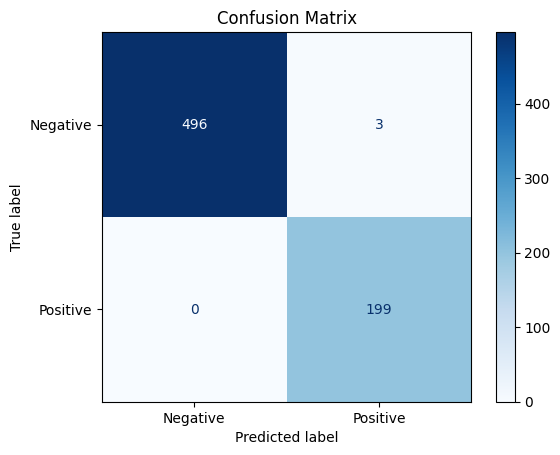

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#Performance Matrix

In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)